In [1]:
%matplotlib inline
%matplotlib notebook
import nibabel as nib
from nibabel.processing import resample_to_output
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from glob import glob
import re
import os

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report

seed = 42
np.random.seed(seed)  # for reproducibility

import os
## os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda0,floatX=float32"
os.environ["KERAS_BACKEND"] = "tensorflow"
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution3D, MaxPooling3D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
data_t1 = np.load("/sdata/comppsych/lesion/Hackathon_Lesion_Data/t1_np_array.npy")
lables_t1 = np.load("/sdata/comppsych/lesion/Hackathon_Lesion_Data/t1_labels.npy")

### There is a lot of variance in brightness between images

(81, 182, 218, 182)


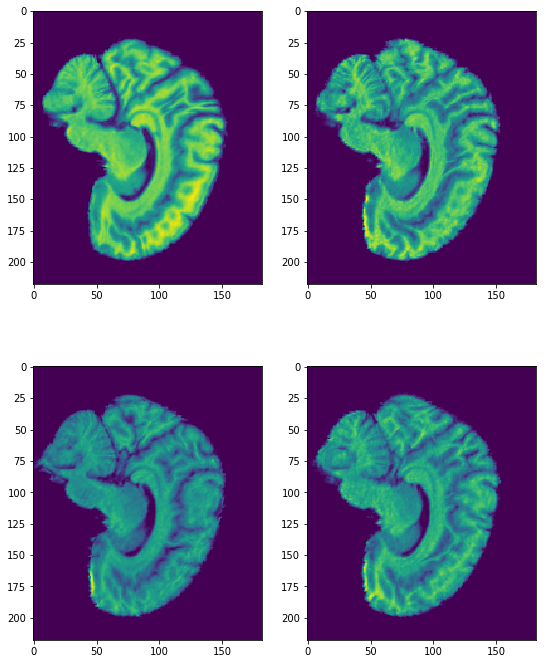

In [73]:
print(data_t1.shape)

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.imshow(data_t1[2*i,80,:,:])

In [50]:
data_t1.shape

(81, 182, 218, 182)

In [66]:
from skimage import data, img_as_float
from skimage import exposure

data_t1_hnorm = np.zeros(data_t1.shape)
for i in range(0, len(data_t1)):
    data_t1_hnorm[i] = exposure.equalize_hist(data_t1[i,:,:,:])
    
#data_t1_anorm = np.zeros(data_t1.shape)
#for i in range(0, len(data_t1)):
#    data_t1_anorm[i] = exposure.equalize_adapthist(data_t1[i,:,:,:], clip_limit = 0.03)
    
data_t1_rescale = np.zeros(data_t1.shape)
for i in range(0, len(data_t1)):
    img = data_t1[i,:,:,:]
    p2, p98 = np.percentile(img, (2, 98))
    data_t1_rescale[i] = exposure.rescale_intensity(img, in_range=(p2, p98))
    

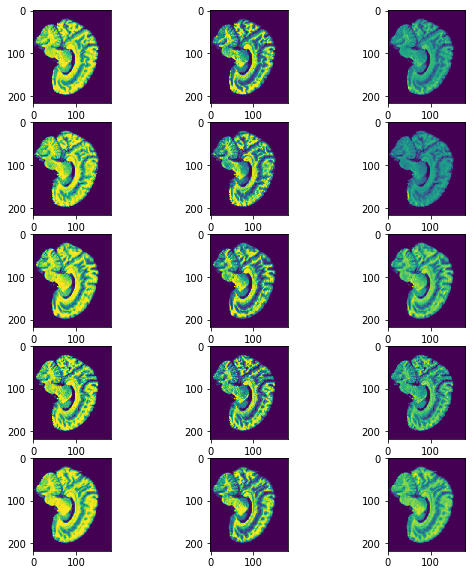

In [74]:

for i in range(3, 18, 3):
    plt.subplot(6, 3, i-2)
    plt.imshow(data_t1_rescale[i,80,:,:])
    plt.subplot(6, 3, i-1)
    plt.imshow(data_t1_hnorm[i,80,:,:])
    plt.subplot(6, 3, i)
    plt.imshow(data_t1[i,80,:,:])
    

In [75]:
np.save("/sdata/comppsych/lesion/Hackathon_Lesion_Data/t1_hnorm", data_t1_hnorm)